In [2]:
import numpy as np
from scipy.sparse import lil_matrix
from math import sqrt
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
class geometric_network():
    def __init__(self, network_type, size, **kwargs):
        ####################################
        ##### Geometric Network Object #####
        ####################################
        
        ### input -- network_type:
        ##                      2D_lattice: creates 2d lattice of given tiling-can be triangular,square, hexagonal
        #                                   --Additional Arguments--
        #                                     tiling = 3,4,6
        #                                     periodic = bool (connects the edge of the grid to the opposite edge)
        ##                      ring_lattice: creates a ring graph with each node degree 2
        #                                    --Additional Arguments--
        #                                     banded=bool
        #
        ##                      chain_lattice:
        #                                     
        ### input -- size: network size, if 2D_lattice, then there will be size^2 many nodes.
        
        ### attribute -- geometric_network.size -- TODO(fix sizes, sizes are different for tiling 4 and 3,6)
        ### attribute -- geometric_network.graph
        ### attribute -- geometric_network.pos
        ### attribute -- geometric_network.A
        
        self.size = size
        
        if network_type == '2D_lattice': 
            tiling = kwargs['tiling']
            per = kwargs['periodic']
            if tiling == 3: 
                self.graph = nx.triangular_lattice_graph(self.size,self.size, periodic = per, with_positions = True)
                self.pos = nx.get_node_attributes(self.graph,'pos')

            elif tiling == 4: 
                self.graph = nx.grid_2d_graph(self.size,self.size, periodic = per)
                self.pos = dict( (n, n) for n in self.graph.nodes() )
                self.labels = dict( ((i, j), i * self.size + j) for i, j in self.graph.nodes() )
                
            elif tiling == 6: 
                self.graph = nx.hexagonal_lattice_graph(self.size,self.size, periodic = per, with_positions = True)
                self.pos = nx.get_node_attributes(self.graph,'pos')
            
        elif network_type == 'ring_lattice':
            if kwargs['banded']: pass
            else:
                self.graph = nx.cycle_graph(self.size)
                theta = (2*np.pi)/self.size
                self.pos = dict((i,(np.sin(theta*i),np.cos(theta*i))) for i in range(self.size))
            
            
        #elif network_type == 'chain_lattice':
            #if banded:
                
            #else:
        
        self.A = nx.adjacency_matrix(self.graph).todense()
              
    def display(self, n_size=15, labels= True):
        
        try:return(nx.draw(self.graph,pos=self.pos, node_size = n_size, with_labels = labels))
        
        except:return(nx.draw(self.graph))
                    

In [10]:
n = 10
t = 3

In [11]:
twoD_latt = geometric_network('2D_lattice',size= n, tiling=t, periodic = False)
ring_latt = geometric_network('ring_lattice', size =n, banded = False)

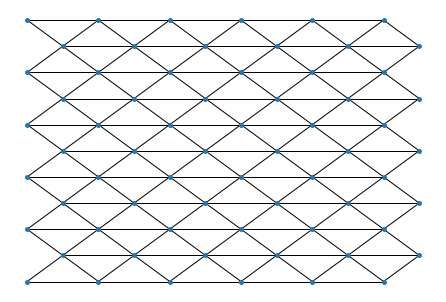

In [12]:
twoD_latt.display(labels= False)

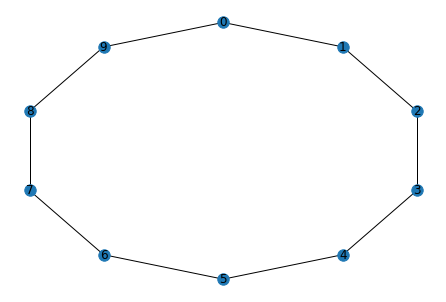

In [9]:
ring_latt.display(n_size=130)